In [1]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os 
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2
import matplotlib.pyplot as plt

Found 214 images belonging to 5 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
14/14 [==============================] - 1s 41ms/step - loss: 1.6053 - accuracy: 0.2477
Epoch 2/15
14/14 [==============================] - 1s 38ms/step - loss: 1.3891 - accuracy: 0.4673
Epoch 3/15
14/14 [==============================] - 1s 37ms/step - loss: 1.3146 - accuracy: 0.4766
Epoch 4/15
14/14 [==============================] - 1s 37ms/step - loss: 1.1764 - accuracy: 0.5981
Epoch 5/15
14/14 [==============================] - 1s 37ms/step - loss: 1.0848 - accuracy: 0.5888
Epoch 6/15
14/14 [==============================] - 1s 37ms/step - loss: 0.8840 - accuracy: 0.6776
Epoch 7/15
14/14 [==============================] - 1s 38ms/step - loss: 0.8173 - accuracy: 0.7009
Epoch 8/15
14/14 [==============================] - 1s 37ms/step - loss: 0.6993 - accuracy: 0.7804
Epoch 9/15
14/14 [==============================] - 1s 41ms/step - loss: 0.5254 - accuracy:

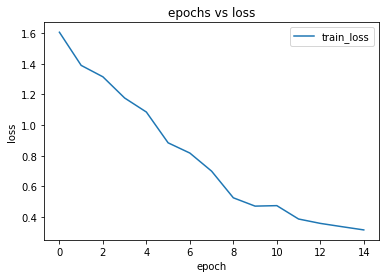

In [2]:
####################### Training Model###########################################
n_classes = 5
hight ,width = 32,32
train_dir = 'Train'
val_dir = 'Test'

batch_size = 16                                          

################Image Pre-Processing ####################
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(   # Directory Showing to Tf
    train_dir,
    target_size=(hight,width),
    batch_size=batch_size,
    class_mode='categorical')

model = Sequential([
                    tf.keras.layers.Conv2D(
    32, (3,3), (1, 1), input_shape = (32,32,3)),
    tf.keras.layers.Conv2D(32, (3,3) , strides=(1,1)),    # Used for Edge Detection
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(
    pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256 , activation = 'relu'),
    tf.keras.layers.Dense(128,activation ='relu' ),
    tf.keras.layers.Dense(5 , activation = 'softmax')

])

#model = Model(inputs=resnet.input, outputs=predictions)
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit_generator(train_generator,
                    
                    epochs=15,
                    verbose=1,
                    )
model.save('papaya.hdf5')


plt.title('epochs vs loss')
plt.plot(history.history['loss'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='best')
plt.show()

0
['anthracnose', 'black_spot', 'phytophthora', 'powdery_mildew', 'ring_spot']


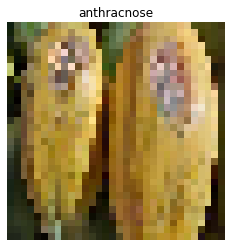

In [3]:
food_list = ['anthracnose','black_spot','phytophthora','powdery_mildew','ring_spot']
model_best = load_model('papaya.hdf5',compile = False)
images = []
images.append('img4.jpeg')



def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(32,32))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    print(index)
    
    print(food_list)
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()


if __name__ == '__main__':
    predict_class(model_best , images , True)